In [33]:
import time
import os
import math
import numpy as np
import pandas as pd
from matplotlib.markers import TICKDOWN
from matplotlib import rcParams
import datetime
from numpy.polynomial import polynomial

import matplotlib.pyplot as plt
import matplotlib
import ipywidgets as widgets
from mpl_interactions import ipyplot as iplt
import numpy as np
import math
matplotlib.use('TkAgg')


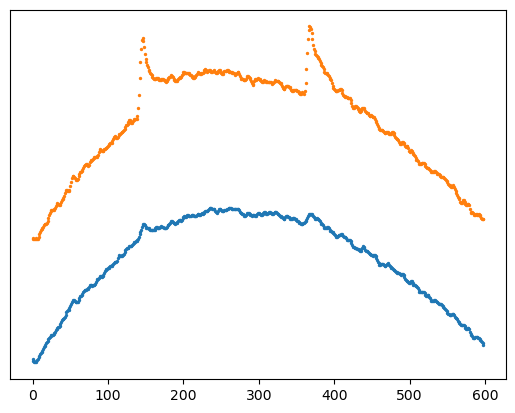

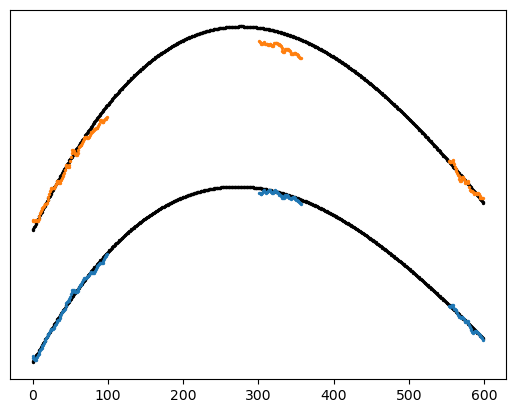

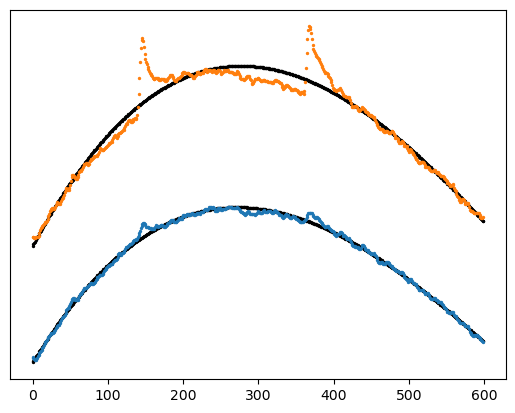

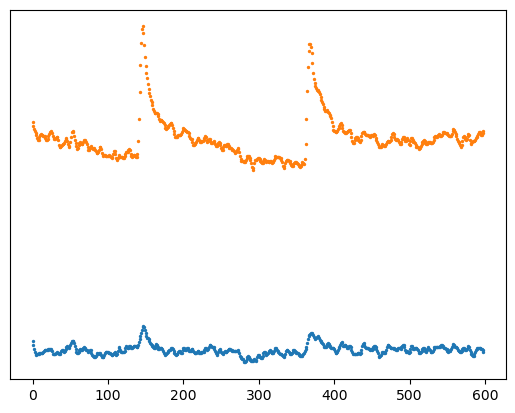

In [6]:
# test: try better baseline correction in python
trace_file = 'C:/Users/jjudge3/Desktop/Data/mm_full_pipeline_targets/better_baseline/04-26-24/selected_zda/Traces1.dat'
# load trace.dat file
def read_dat_trace_file(filename):
    data_arr = pd.read_csv(filename,
                                 sep='\t',
                                 header=0,
                                 names=['Pt',  'ROI1', 'ROI2'])
    return data_arr

trace = read_dat_trace_file(trace_file)
t_complete = np.linspace(0, len(trace['Pt']), len(trace['Pt']))
plt.scatter(trace['Pt'], trace['ROI1'], s=2)
plt.scatter(trace['Pt'], trace['ROI2'] + 2, s=2)
plt.yticks([])
plt.show()

exclusion_windows = [[100,300], [357, 552]]
#exclusion_windows = [[135, 550]]

trace_cp = trace.copy()
for ew in exclusion_windows:
    trace_cp = trace_cp.drop(trace_cp[(trace_cp['Pt'] >= ew[0]) & 
                                      (trace_cp['Pt'] <= ew[1])].index)

# fit a polynomial to the trace and subtract it
def fit_polynomial(x, y, t_complete, degree=3):
    coefs = polynomial.polyfit(x, y, degree)
    y_fit = polynomial.polyval(t_complete, coefs)
    return y_fit

x = trace['Pt']
y = trace['ROI1']
y_fit1 = fit_polynomial(x, y, t_complete)
y = trace['ROI2']
y_fit2 = fit_polynomial(x, y, t_complete)

plt.scatter(t_complete, y_fit1, s=2, c='k')
plt.scatter(t_complete, y_fit2 + 2, s=2, c='k')
plt.scatter(trace_cp['Pt'], trace_cp['ROI1'], s=2)
plt.scatter(trace_cp['Pt'], trace_cp['ROI2'] + 2, s=2)
plt.yticks([])
plt.show()


plt.scatter(t_complete, y_fit1, s=2, c='k')
plt.scatter(t_complete, y_fit2 + 2, s=2, c='k')
plt.scatter(trace['Pt'], trace['ROI1'], s=2)
plt.scatter(trace['Pt'], trace['ROI2'] + 2, s=2)
plt.yticks([])
plt.show()

# subtract the polynomial fit from the trace and display it
new_trace1 = trace['ROI1'] - y_fit1
new_trace2 = trace['ROI2'] - y_fit2

plt.scatter(trace['Pt'], new_trace1, s=2)
plt.scatter(trace['Pt'], new_trace2 + 2, s=2)
plt.yticks([])
plt.show()

In [50]:
y = trace['ROI2']
def baseline_correct_trace(t_complete, ex1_start, ex1_end, ex2_start, ex2_end, degree):
    exclusion_windows = [[int(ex1_start), 
                          int(ex1_end)], 
                          [int(ex2_start), 
                           int(ex2_end)]]
    trace_cp = trace.copy()
    for ew in exclusion_windows:
        trace_cp = trace_cp.drop(trace_cp[(trace_cp['Pt'] >= ew[0]) & 
                                      (trace_cp['Pt'] <= ew[1])].index)
        
    print(len(trace_cp))
    x = trace_cp['Pt']
    y = trace_cp['ROI2']
    print(int(degree), exclusion_windows)
    y_fit1 = fit_polynomial(x, y, t_complete, int(degree))

    trace_cp = trace.copy()
    
    return trace_cp['ROI2'] - y_fit1

def excluded_raw_trace(t_complete, ex1_start, ex1_end, ex2_start, ex2_end, degree):
    exclusion_windows = [[int(ex1_start), 
                          int(ex1_end)], 
                          [int(ex2_start), 
                           int(ex2_end)]]
    trace_cp = trace.copy()
    for ew in exclusion_windows:
        trace_cp.loc[(trace_cp['Pt'] >= ew[0]) & 
                                    (trace_cp['Pt'] <= ew[1]), 'ROI2'] = np.nan
    return trace_cp['ROI2']

def trace_fit(t_complete, ex1_start, ex1_end, ex2_start, ex2_end, degree):
    exclusion_windows = [[int(ex1_start), 
                          int(ex1_end)], 
                          [int(ex2_start), 
                           int(ex2_end)]]
    trace_cp = trace.copy()
    for ew in exclusion_windows:
        trace_cp = trace_cp.drop(trace_cp[(trace_cp['Pt'] >= ew[0]) & 
                                      (trace_cp['Pt'] <= ew[1])].index)
        
    print(len(trace_cp))
    x = trace_cp['Pt']
    y = trace_cp['ROI2']
    print(int(degree), exclusion_windows)
    y_fit1 = fit_polynomial(x, y, t_complete, int(degree))
    
    return y_fit1

t_complete = np.linspace(0, len(trace['Pt']), len(trace['Pt']))
fig, ax = plt.subplots(2, 1, figsize=(6, 9))

# exclusion_windows = [[100,300], [357, 552]]
ex1_start = np.linspace(100, 350, 200)
ex1_end = np.linspace(101, 350, 249)
ex2_start = np.linspace(350, 600, 250)
ex2_end = np.linspace(351, 600, 249)
degree = np.linspace(3, 12, 9)

controls = iplt.plot(t_complete, baseline_correct_trace, 
                     ex1_start=ex1_start, 
                     ex1_end=ex1_end, 
                     ex2_start=ex2_start, 
                     ex2_end=ex2_end, 
                     degree=degree,
                     ax=ax[0])
iplt.plot(t_complete, excluded_raw_trace, 'tab:blue', 
                    controls=controls,
                    ax=ax[1])
iplt.plot(t_complete, trace_fit, 'black', 
                    controls=controls,
                    ax=ax[1])

595
3 [[100, 101], [350, 351]]
595
3 [[100, 101], [350, 351]]


AttributeError: 'Controls' object has no attribute 'vbox'